## 1. 머신러닝 (50점)
데이터 : 객실 사용 여부 관련 데이터

In [37]:
import pandas as pd
raw_df = pd.read_csv('../data/hotel_bookings.csv')
raw_df.head()

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,NaN,0,0,1,0,131.50
1,0,No Deposit,303.0,2,2,NaN,0,0,0,0,73.95
2,0,No Deposit,33.0,2,3,0.0,0,0,0,0,NaN
3,0,No Deposit,48.0,0,1,0.0,0,0,1,0,80.30
4,0,No Deposit,216.0,4,7,0.0,0,0,2,0,60.90


In [38]:
# (1) 데이터를 탐색하고 탐색 결과를 제시하시오.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

target_col = 'is_canceled'

df = raw_df.copy()

In [39]:
# General Analysis

In [40]:
'''
1. lead_time, is_repeated_guest, adr에 결측치 존재
2. object 타입 존재 (이후 인코딩 필요)
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


In [41]:
'''
feature 별로 scale 차이 존재 -> 이후 scaling 필요
'''
df.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
count,20000.00000,19995.000000,20000.000000,20000.000000,19642.000000,20000.000000,20000.000000,20000.000000,20000.000000,18937.000000
mean,0.12000,85.978345,0.892550,2.380400,0.038133,0.032900,0.169050,0.269400,1.983950,101.410239
std,0.32497,96.427240,0.952077,1.777345,0.191521,0.455552,1.502426,0.687566,15.927212,49.245097
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,0.00000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.800000
50%,0.00000,51.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.500000
75%,0.00000,132.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000
max,1.00000,629.000000,13.000000,30.000000,1.000000,26.000000,66.000000,17.000000,379.000000,451.500000


In [42]:
# target analysis

In [43]:
'''
target 데이터가 매우 불균형 하다. -> 이후 샘플링을 통해 불균형을 해소할 필요가 있어보인다.
'''
df[target_col].value_counts()

is_canceled
0    17600
1     2400
Name: count, dtype: int64

<Axes: >

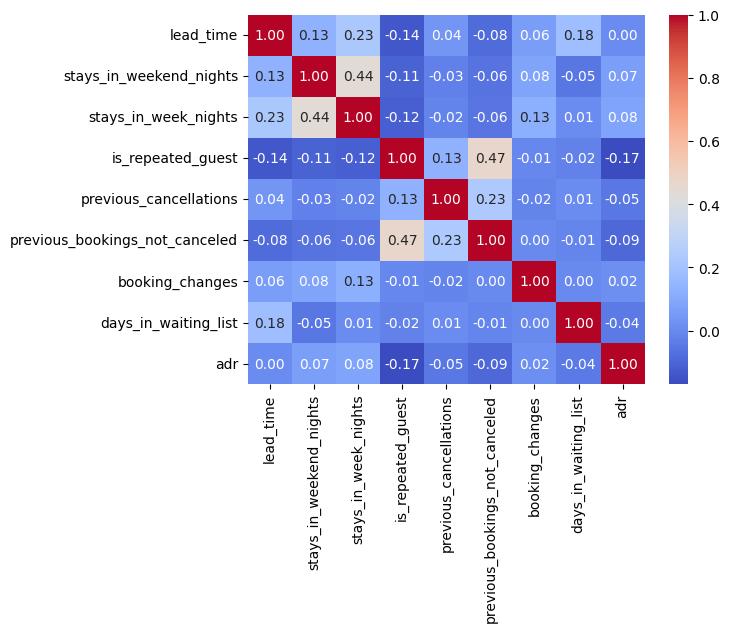

In [44]:
'''
stays_in_weekend_nights 와 stays_in_week_nights 는 유의미한 양의 상관관계를 가지는 것으로 보임
previous_bookings_not_canceled 와 is_repeated_guest 는 유의미한 양의 상관관계를 가지는 것으로 보임
-> feature의 수가 크지는 않지만, pca를 확인해 보는것도 유의미할 수 있다.
'''
sns.heatmap(df.drop(columns=[target_col]).select_dtypes('number').corr(),
            annot=True, fmt='.2f', cmap='coolwarm')



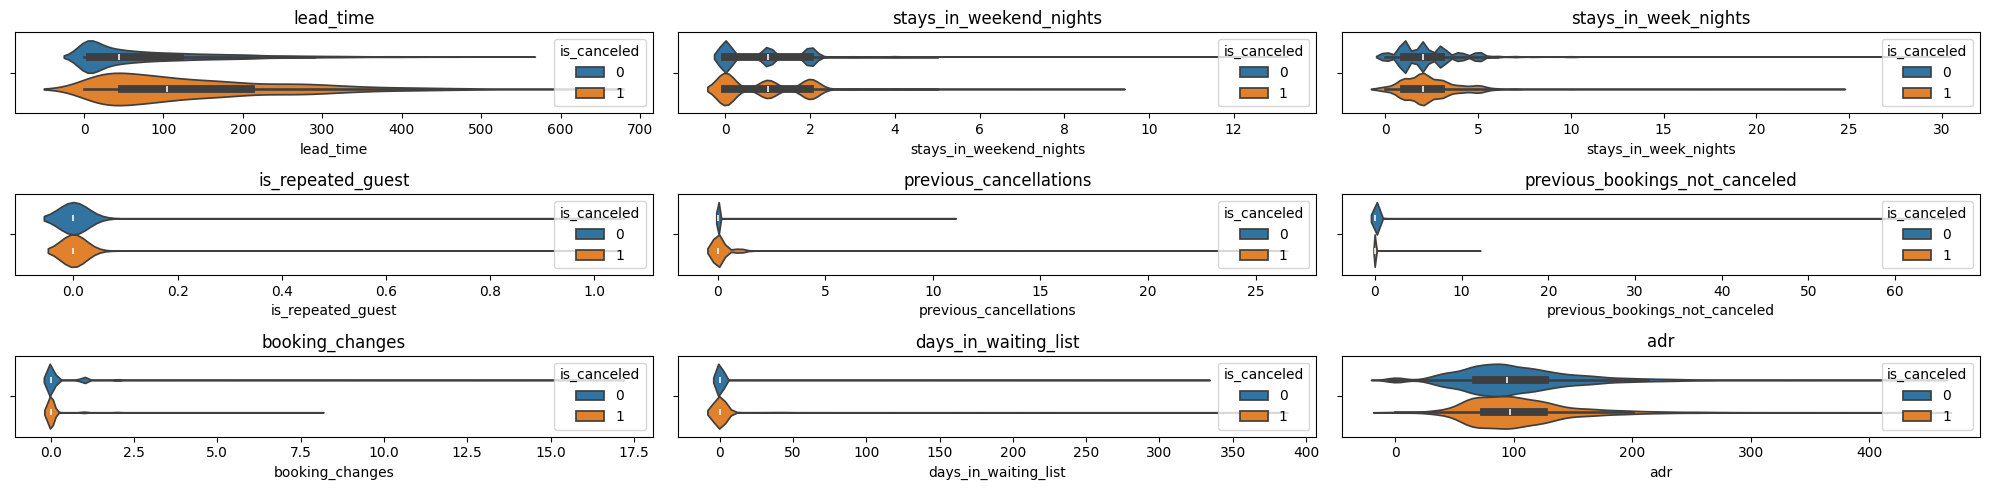

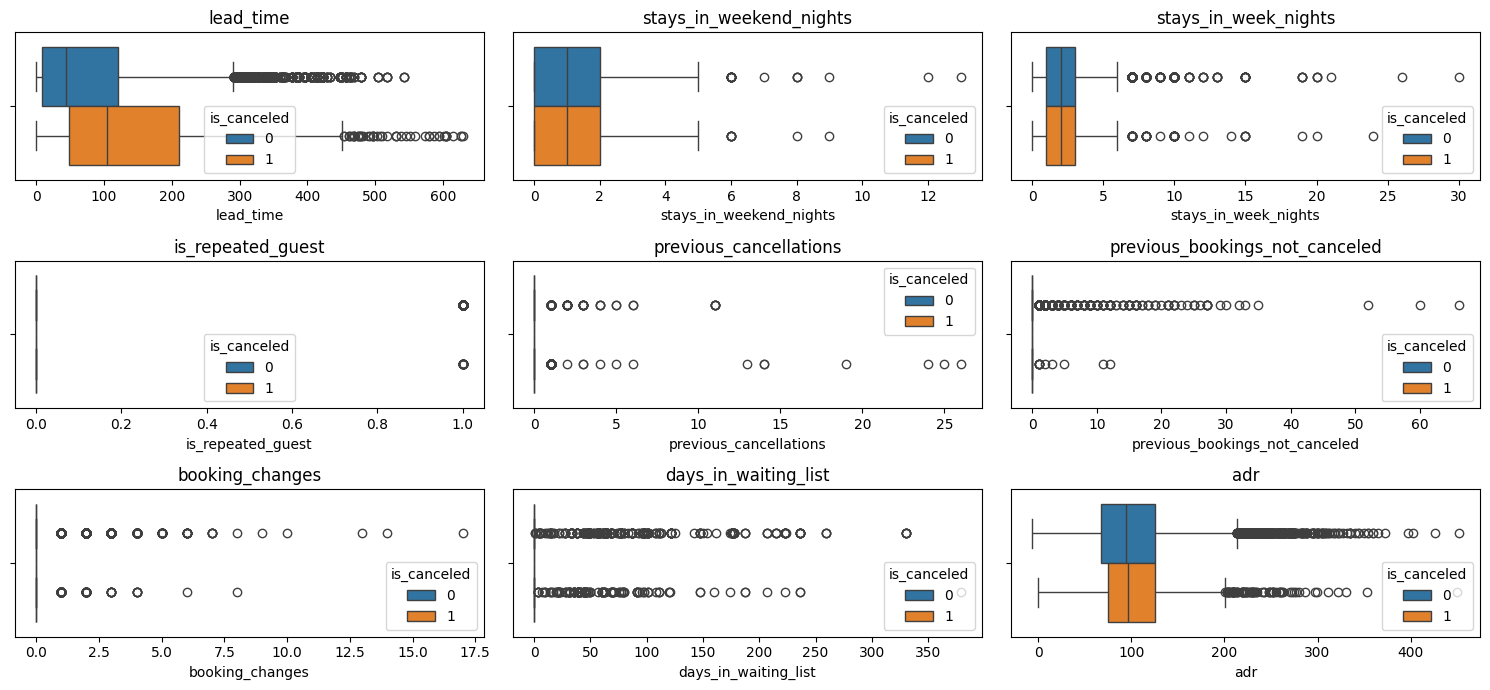

In [45]:
'''
target_col에 따른 feature의 차이는 lead_time 정도에서 확인할 수 있었다.
대부분의 feature에서 이상치라고 판단할만한 데이터가 다수 발견되었다.
    다만 이 데이터를 제거 할것인지에 대한 부분을 지금 결정하기는 어려울 것으로 보인다.
'''
number_cols = df.drop(columns=[target_col]).select_dtypes('number').columns
len(number_cols)
fig, axes = plt.subplots(3, 3, figsize=(20, 5))
axes = axes.flatten()
for idx, number_col in enumerate(number_cols):
    sns.violinplot(hue=target_col, x=number_col, data=df, ax=axes[idx])
    axes[idx].set_title(number_col)
plt.tight_layout()
plt.show()

number_cols = df.drop(columns=[target_col]).select_dtypes('number').columns
len(number_cols)
fig, axes = plt.subplots(3, 3, figsize=(15, 7))
axes = axes.flatten()
for idx, number_col in enumerate(number_cols):
    sns.boxplot(hue=target_col, x=number_col, data=df, ax=axes[idx])
    axes[idx].set_title(number_col)
plt.tight_layout()
plt.show()

In [46]:
# (2) 결측치를 탐색하고 대체 방법 및 근거를 제시하시오.

In [47]:
'''
lead_time, is_repeated_guest, adr 에서 결측치를 가지고 있는 row가 발견 되었다.

lead_time의 경우 numeric feature
is_repeated_guest 의 경우 categorical feature
adr의 경우에는 numeric feature로 보인다.

이번 경우에는 is_repeated_guest는 단순 대치법 (최빈값 대치)
lead_time, adr의 경우 KNNImputer를 통해 대치한다.
'''
df.isna().sum() / len(df) * 100

is_canceled                       0.000
deposit_type                      0.000
lead_time                         0.025
stays_in_weekend_nights           0.000
stays_in_week_nights              0.000
is_repeated_guest                 1.790
previous_cancellations            0.000
previous_bookings_not_canceled    0.000
booking_changes                   0.000
days_in_waiting_list              0.000
adr                               5.315
dtype: float64

In [48]:
# 단순 대치
df['is_repeated_guest'] = df['is_repeated_guest'].fillna(df['is_repeated_guest'].mode().iloc[0])

In [49]:
# 단순 대치
from sklearn.impute import KNNImputer

# KNN대치
imputer = KNNImputer()
df[['lead_time','adr']] = imputer.fit_transform(df[['lead_time','adr']])

In [50]:
#### (3) 데이터 질을 향상시킬 수 있는 방법을 제안하시오.
'''
위에 EDA를 진행한 결과 다양한 feature에서 이상치라고 볼 수 있을만한 데이터가 많이 보였다.
이를 실무자의 도메인 지식과 결합하여 적절히 처리한다면 데이터의 질이 올라갈 것이다.

매우 높은 상관관계를 가지는 feature는 없었지만, 유의미한 상관관계가 있다고 할 수 있는 feature는 꽤 존재 했다.
이를 적절히 차원축소를 진행한다면 모델의 일반화 성능에 효과를 보여줄 수 도 있을 것이다.
'''

'\n위에 EDA를 진행한 결과 다양한 feature에서 이상치라고 볼 수 있을만한 데이터가 많이 보였다.\n이를 실무자의 도메인 지식과 결합하여 적절히 처리한다면 데이터의 질이 올라갈 것이다.\n\n매우 높은 상관관계를 가지는 feature는 없었지만, 유의미한 상관관계가 있다고 할 수 있는 feature는 꽤 존재 했다.\n이를 적절히 차원축소를 진행한다면 모델의 일반화 성능에 효과를 보여줄 수 도 있을 것이다.\n'

In [51]:
# (4) 데이터 불균형을 시각화하여 식별하고 불균형 판단근거를 작성하시오.

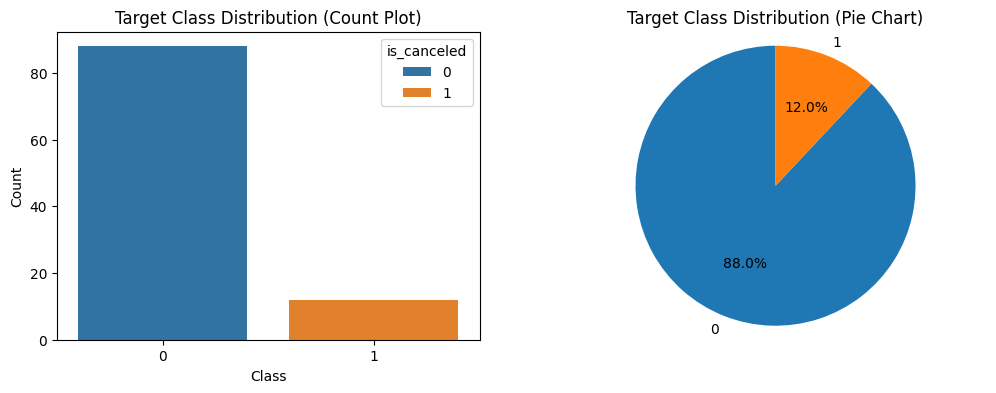

In [52]:
'''
→ 클래스 A가 전체의 85%, 클래스 B가 15%를 차지하여, 클래스 간 차이가 70%p에 달함.  
   일반적으로 7:3 이상은 불균형으로 간주되며, 본 데이터는 심각한 데이터 불균형 상태로 판단됨.
'''
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=df, x=target_col, ax=axes[0], hue=target_col, stat='percent')
axes[0].set_title("Target Class Distribution (Count Plot)")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")

class_counts = df[target_col].value_counts()
class_labels = class_counts.index
class_sizes = class_counts.values


axes[1].pie(class_sizes, labels=class_labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title("Target Class Distribution (Pie Chart)")
axes[1].axis('equal')
plt.show()

In [53]:
# (5) 오버 샘플링 기법을 설명하고 비교한 뒤 2개 기법을 선정하고 근거를 제시하시오
'''
오버 샘플링 기법
1. Random Over Sampling
    : 소수 클래스의 데이터를 복제하여 데이터의 균형을 맞추는 방법이다. 
    복제를 기반으로 하기 때문에 소수 클래스의 데이터가 중복되어 학습 데이터에 과적합되는 문제가 발생할 수 있다.

2. SMOTE
    : 데이터를 생성하여 소수 클래스의 데이터를 증가시키는 방법이다. 
    소수 클래스의 데이터를 복제하는 것이 아닌, 소수 클래스의 데이터와 가장 가까운 이웃 데이터를 찾아 그 사이에 데이터를 생성한다. 
    이를 통해 과적합 문제를 완화할 수 있다.

이번 경우에는 데이터의 불균형이 심한편이기에 오버 샘플링을 해야하는 데이터가 많다.
이 경우에는 데이터의 중복을 허용하는 Random Over Sampling 보다는 SMOTE가 더욱 효과적일 것으로 보인다.
'''

'\n오버 샘플링 기법\n1. Random Over Sampling\n    : 소수 클래스의 데이터를 복제하여 데이터의 균형을 맞추는 방법이다. \n    복제를 기반으로 하기 때문에 소수 클래스의 데이터가 중복되어 학습 데이터에 과적합되는 문제가 발생할 수 있다.\n\n2. SMOTE\n    : 데이터를 생성하여 소수 클래스의 데이터를 증가시키는 방법이다. \n    소수 클래스의 데이터를 복제하는 것이 아닌, 소수 클래스의 데이터와 가장 가까운 이웃 데이터를 찾아 그 사이에 데이터를 생성한다. \n    이를 통해 과적합 문제를 완화할 수 있다.\n\n이번 경우에는 데이터의 불균형이 심한편이기에 오버 샘플링을 해야하는 데이터가 많다.\n이 경우에는 데이터의 중복을 허용하는 Random Over Sampling 보다는 SMOTE가 더욱 효과적일 것으로 보인다.\n'

In [54]:
# 오버샘플링 진행을 위한 object 타입 인코딩
df = pd.concat([
    df.drop(columns=['deposit_type']),
    pd.get_dummies(df['deposit_type'])
], axis=1)

In [55]:
from imblearn.over_sampling import RandomOverSampler

random_over_sampler = RandomOverSampler()
X = df.drop(columns=[target_col])
y = df[target_col]

X_ros, y_ros = random_over_sampler.fit_resample(X, y)
X_ros.shape, y_ros.shape

((35200, 12), (35200,))

In [56]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X = df.drop(columns=[target_col])
y = df[target_col]

X_smote, y_smote = smote.fit_resample(X, y)
X_smote.shape, y_smote.shape

((35200, 12), (35200,))

In [ ]:
# (6) 기법을 선정한 이유를 작성하고, 원데이터를 포함해 3개의 데이터 세트를 구성하시오.

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

scaler_ros = StandardScaler()
X_train_ros = scaler_ros.fit_transform(X_train_ros)
X_test_ros = scaler_ros.transform(X_test_ros)

scaler_smote = StandardScaler()
X_train_smote = scaler_smote.fit_transform(X_train_smote)
X_test_smote = scaler_smote.transform(X_test_smote)

In [ ]:
# (7) 오버 샘플링 데이터와 원데이터를 사용해 정확도 측면 모델 하나와 속도 측면의 모델 하나를 선정하고, 그 이유를 설명하시오.

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print("Original Data")
print("Train Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Train F1: ", f1_score(y_train, y_train_pred))
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Test F1: ", f1_score(y_test, y_test_pred))
print('='*50)

rf_ros = RandomForestClassifier(random_state=42)
rf_ros.fit(X_train_ros, y_train_ros)
y_train_ros_pred = rf_ros.predict(X_train_ros)
y_test_ros_pred = rf_ros.predict(X_test_ros)

print("Random Over Sampling Data")
print("Train Accuracy: ", accuracy_score(y_train_ros, y_train_ros_pred))
print("Train F1: ", f1_score(y_train_ros, y_train_ros_pred))
print("Test Accuracy: ", accuracy_score(y_test_ros, y_test_ros_pred))
print("Test F1: ", f1_score(y_test_ros, y_test_ros_pred))
print('='*50)

rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)
y_train_smote_pred = rf_smote.predict(X_train_smote)
y_test_smote_pred = rf_smote.predict(X_test_smote)

print("SMOTE Data")
print("Train Accuracy: ", accuracy_score(y_train_smote, y_train_smote_pred))
print("Train F1: ", f1_score(y_train_smote, y_train_smote_pred))
print("Test Accuracy: ", accuracy_score(y_test_smote, y_test_smote_pred))
print("Test F1: ", f1_score(y_test_smote, y_test_smote_pred))

Original Data
Train Accuracy:  0.9946875
Train F1:  0.9776609724047306
Test Accuracy:  0.92625
Test F1:  0.5827439886845828
Random Over Sampling Data
Train Accuracy:  0.9927556818181819
Train F1:  0.9928027095681625
Test Accuracy:  0.9654829545454545
Test F1:  0.9660661918726435
SMOTE Data
Train Accuracy:  0.9959161931818182
Train F1:  0.9959206839062112
Test Accuracy:  0.9051136363636364
Test F1:  0.9039677975848188


In [ ]:
# (8) 원데이터와 오버 샘플링 데이터를 가지고 각각 분류한 결과를 바탕으로, 오버 샘플링이 성능에 미친 영향에 대해 작성하시오.
'''
Original Data
    - test_accuracy -> 2위
    - test_f1 -> 3위 (매우 낮음)
    
    
Random Over Sampling Data
    - test_accuracy -> 1위
    - test_f1 -> 1위

SMOTE Data
    - test_accuracy -> 3위
    - test_f1 -> 2위
    
Random Over Sampling Data가 성능이 가장 좋았다.
SMOTE가 두번째로 좋았으며, 원데이터가 가장 성능이 안좋았다.
오버 샘플링을 통해 F1 score를 유의미하게 향상 시킬 수 있었다. SMOTE보다 Random Over Sampling이 더 좋은 성능을 보여주었는데,
이는 SMOTE가 데이터를 생성하는 방식이 이번 데이터에 적합하지 않았기 때문으로 보인다.
'''

### 2. 통계분석 (50점)

In [63]:
# 1. 공장에서는 시제품의 농도(%)가 60이라고 주장하며 품질관리팀에서 10개의 샘플을 뽑았다. 유의수준 5%에서 다음을 검정하시오.
x = [52, 50, 62, 75, 26, 45, 62, 35, 57, 14]

In [64]:
# (1) 연구가설, 귀무가설을 작성하시오.
H0 = '평균 농도가 60%이다.'
H1 = '평균 농도가 60%가 아니다.'

In [68]:
# (2) 유효한 샘플의 수를 계산하시오.
'''
유효한 샘플 수를 구하기 위해서는 검정력에 대한 가정이 필요하다.
이번 경우 검정력을 0.8로 가정하고, 유효한 샘플 수를 구해보자.
'''
import numpy as np
from statsmodels.stats.power import TTestPower  # 단일표본 t-test 용

x = [52, 50, 62, 75, 26, 45, 62, 35, 57, 14]

# 효과 크기: 기준값 60과의 차이 (Cohen's d)
effect_size = (np.mean(x) - 60) / np.std(x, ddof=1)

alpha = 0.05
power = 0.8

analysis = TTestPower()
sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)

print("필요한 유효 샘플 수:", np.ceil(sample_size))

필요한 유효 샘플 수: 20.0


In [72]:
# (3) 검정통계량을 구하고 연구가설 채택 여부를 작성하시오.
'''
유효한 샘플의 수보다 현재 샘플의 수가 작기 때문에 비모수적 검정법을 진행한다.

'''
from scipy import stats

H0 = '농도가 60% 이다'
H1 = '농도가 60%가 아니다.'

statistic, p_value = stats.wilcoxon(np.array(x) - 60, alternative='two-sided')

print(f'statistic   :{statistic}')
if 0.05 < p_value:
    print(H0)
else:
    print(H1)

statistic   :9.5
농도가 60% 이다


In [99]:
# 2. 코로나 시계열 데이터로 다음을 수행하시오.
import pandas as pd
covid = pd.read_csv('../data/서울특별시 코로나19.csv')
covid.head()

,날짜,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,2022-03-30,37261,33753,55376,81018,96008,95433,103288,116862,75118,...,148359,109973,63687,110293,106238,132305,104368,136200,176765,121926
1,2022-03-29,36216,32835,53872,79030,93474,92993,100255,113609,72934,...,143573,106162,61840,106171,102955,127626,100529,132333,172292,118842
2,2022-03-28,35276,31878,52391,76802,91030,90277,97419,110583,70754,...,139633,103573,59946,104109,100665,124805,98869,128813,167386,115846
3,2022-03-27,34879,31577,51652,76108,89876,89302,96359,109500,70003,...,137908,102610,59393,102916,99426,123374,96873,126296,165373,113549
4,2022-03-26,34061,30903,50720,74178,87770,87345,93690,106437,68329,...,134285,99938,57925,100349,96989,120413,95124,123992,161650,110649


In [100]:
covid = covid.set_index('날짜')
covid = covid.sort_index()

In [122]:
# (1) ACF를 사용해서 distance를 계산하시오.
import statsmodels.api as sm
from scipy.spatial.distance import pdist, squareform

def acf(x, n_lags):
    return sm.tsa.stattools.acf(x, nlags=n_lags)

# ACF 계산
n_lags = 50  # 적절한 lag 수 설정
acf_list = [acf(covid[col], n_lags) for col in covid.columns]
acf_df = pd.DataFrame(acf_list, index=covid.columns)
display(acf_df.head())

# 거리 행렬 계산
dist_matrix = pdist(acf_df, metric='euclidean')  # 유클리드 거리 계산
dist_square = squareform(dist_matrix)           # 2D 거리 행렬로 변환
dist_df = pd.DataFrame(dist_square, index=acf_df.index, columns=acf_df.index)
display(dist_df.head())

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
종로구,1.0,0.965624,0.932172,0.899077,0.865542,0.832363,0.794512,0.761958,0.729971,0.699409,...,0.216306,0.212061,0.208157,0.204578,0.201230,0.197972,0.194958,0.192258,0.189781,0.187406
중구,1.0,0.966025,0.932933,0.900435,0.867391,0.834610,0.796898,0.764614,0.733020,0.702617,...,0.227517,0.223441,0.219691,0.216193,0.212851,0.209624,0.206512,0.203552,0.200714,0.198004
용산구,1.0,0.965807,0.932148,0.899075,0.865682,0.832234,0.798381,0.765454,0.733336,0.702647,...,0.209172,0.204534,0.200262,0.196287,0.192463,0.188846,0.185432,0.182215,0.179201,0.176367
성동구,1.0,0.964843,0.930035,0.895739,0.860691,0.826010,0.789577,0.755252,0.721447,0.689063,...,0.149267,0.145035,0.141392,0.138206,0.135204,0.132406,0.129886,0.127491,0.125167,0.123067
광진구,1.0,0.965118,0.930705,0.896734,0.862274,0.828063,0.793461,0.759914,0.727410,0.696133,...,0.165583,0.160670,0.156250,0.152248,0.148459,0.144907,0.141579,0.138460,0.135571,0.132935


,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
종로구,0.000000,0.056860,0.035112,0.341154,0.250144,0.073899,0.228361,0.215943,0.172874,0.225021,...,0.373123,0.066144,0.139622,0.094531,0.193287,0.144214,0.179355,0.081200,0.224966,0.205289
중구,0.056860,0.000000,0.086401,0.397675,0.306304,0.127113,0.284901,0.272583,0.229399,0.281543,...,0.429797,0.122498,0.196181,0.151064,0.249869,0.200680,0.234930,0.106599,0.280771,0.259664
용산구,0.035112,0.086401,0.000000,0.314410,0.221439,0.043745,0.202030,0.189283,0.146444,0.197700,...,0.347266,0.043035,0.117874,0.075088,0.166175,0.116801,0.149351,0.059810,0.195567,0.173464
성동구,0.341154,0.397675,0.314410,0.000000,0.095686,0.273902,0.113091,0.126127,0.168468,0.117131,...,0.036680,0.275365,0.204145,0.248695,0.148844,0.198542,0.167960,0.333728,0.122294,0.156577
광진구,0.250144,0.306304,0.221439,0.095686,0.000000,0.181128,0.032617,0.040152,0.079057,0.028958,...,0.130348,0.184446,0.118931,0.160739,0.058763,0.106828,0.073091,0.238691,0.027391,0.063733


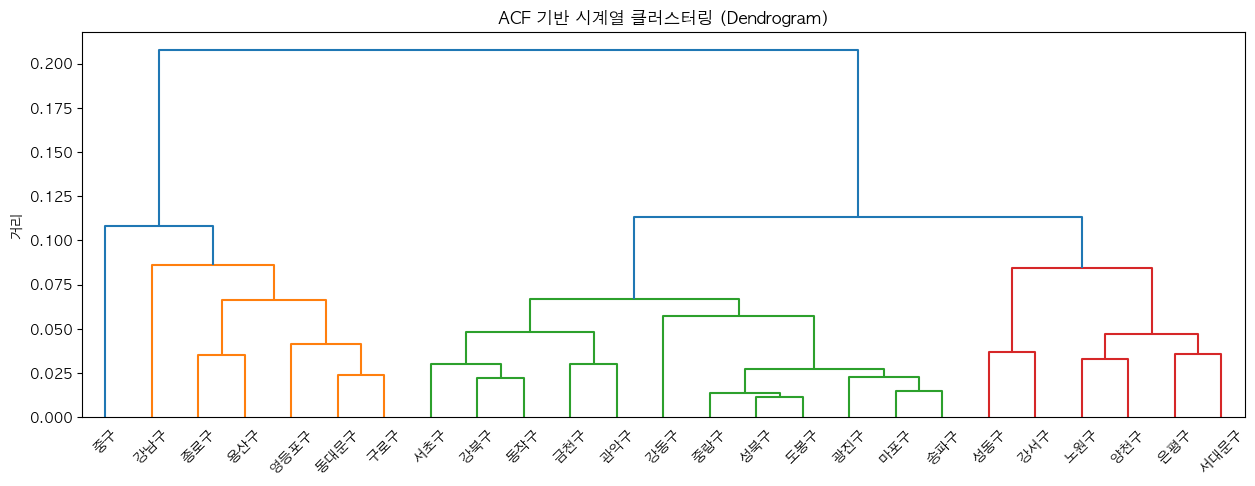

In [126]:
# (2) 계층적 군집 분석을 위해 덴드로그램을 작성하시오.
from scipy.cluster.hierarchy import linkage, dendrogram

linked = linkage(dist_matrix, method='average')  # 계층적 군집 분석 수행

# 덴드로그램 시각화
plt.figure(figsize=(15, 5))
dendrogram(linked, labels=dist_df.index, color_threshold=0.5 * max(linked[:, 2]))
plt.title("ACF 기반 시계열 클러스터링 (Dendrogram)")
plt.ylabel("거리")
plt.xticks(rotation=45)
plt.show()

In [127]:
# 3. 사회과학, 자연과학, 공학 세 개 학과의 평점조사표를 보고 학과와 성적이 관계있는지 검정하시오.
사회 = [16, 30, 12]
자연 = [12, 20, 3]
공학 = [18, 13, 14]
table = pd.DataFrame({'사회과학': 사회,
                     '자연과학': 자연,
                      '공학': 공학},
                     index=['3.5~4.5', '2.5~3.5', '1.5~2.5'])
table

,사회과학,자연과학,공학
3.5~4.5,16,12,18
2.5~3.5,30,20,13
1.5~2.5,12,3,14


In [128]:
# (1) 연구가설, 귀무가설을 작성하시오.
H0 = '학과와 성적은 관계가 없다.'
H1 = '학과와 성적은 관계가 있다.'

In [129]:
# (2) 학과와 성적이 독립일 때 기댓값을 구하시오.
from scipy import stats

chi2, p, dof, expected = stats.chi2_contingency(table)
expected = pd.DataFrame(expected, columns=table.columns, index=table.index)
expected

,사회과학,자연과학,공학
3.5~4.5,19.333333,11.666667,15.000000
2.5~3.5,26.478261,15.978261,20.543478
1.5~2.5,12.188406,7.355072,9.456522


In [118]:
# (3) 검정통계량을 구하고 연구가설 채택 여부를 작성하시오.
chi2, p, dof, expected = stats.chi2_contingency(table)

print(f'chi2   :{chi2}')
print(f'p-value:{p}')
if 0.05 < p:
    print(H0)
else:
    print(H1)    

chi2   :10.199441509990177
p-value:0.03719883770303157
학과와 성적은 관계가 있다.
